# BRASIL EM DADOS | INTRODUÇÃO À CIÊNCIA DOS DADOS

**Grupo:** Estela Miranda Batista, 3305 | João Marcos Alves Modesto Ramos, 3506 | Roniel Barbosa, 

In [1]:
# Importando as Bibliotecas Utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Retirada de Warnings do Projeto
warnings.filterwarnings("ignore")

# Dataframe de Covid
path1 = "./Dados/Covid/HIST_PAINEL_COVIDBR_2020_Parte1_22ago2021.csv"
path2 = "./Dados/Covid/HIST_PAINEL_COVIDBR_2020_Parte2_22ago2021.csv"
path3= "./Dados/Covid/HIST_PAINEL_COVIDBR_2021_Parte1_22ago2021.csv"
path4 = "./Dados/Covid/HIST_PAINEL_COVIDBR_2021_Parte2_22ago2021.csv"
path5 = [path1,path2,path3,path4]
df_from_each_file = (pd.read_csv(f,error_bad_lines=False,sep=';') for f in path5)
dadosCovid = pd.concat(df_from_each_file, ignore_index=True)

# Dataframe de Vacina
path6 = "./Dados/Vacina/dadosTipoVacina.xlsx"
dadosTipoVacina = pd.read_excel(path6)
path7 = "./Dados/Vacina/dadosVacinacaoData.xlsx"
dadosVacinacaoData = pd.read_excel(path7)

# Dados Eleições
pathPIB = "./Dados/eleicoesPIB.csv"
dadosEleicaoPIB = pd.read_csv(pathPIB).set_index('Estado')

## 🔵 PREPARAÇÃO DOS DADOS

### Dados do Covid-19

In [2]:
# Remoção dos Atributos não uUilizados na Análise
dadosCovid = dadosCovid.drop(columns=['coduf','codmun','codRegiaoSaude','nomeRegiaoSaude','Recuperadosnovos','emAcompanhamentoNovos','interior/metropolitana'])
dadosCovid = dadosCovid[dadosCovid.estado != 0]

# Fazendo Limpeza em Campos que não poderiam estar negativos, ou nulos
dadosCovid = dadosCovid[(dadosCovid.municipio.isna()) & (dadosCovid.estado.isna() == False) & (dadosCovid.populacaoTCU2019.isna() == False) & (dadosCovid.estado != 0)]
dadosCovid = dadosCovid[dadosCovid["casosNovos"] >= 0] 
dadosCovid = dadosCovid[dadosCovid["obitosNovos"] >= 0] 

In [3]:
dadosCovid['data'] = pd.to_datetime(dadosCovid['data'])
dadosCovid['data']

158       2020-02-25
159       2020-02-26
160       2020-02-27
161       2020-02-28
162       2020-02-29
             ...    
2592706   2021-08-18
2592707   2021-08-19
2592708   2021-08-20
2592709   2021-08-21
2592710   2021-08-22
Name: data, Length: 14695, dtype: datetime64[ns]

In [4]:
# Remoção dos Atributos não uUilizados na Análise
dadosTipoVacina = dadosTipoVacina.drop(columns=['Cód. IBGE'])
dadosVacinacaoData = dadosVacinacaoData[dadosVacinacaoData["Data Vacinação"] != '-']

# Remoção de alguns ruídos
dadosVacinacaoData = dadosVacinacaoData[dadosVacinacaoData.index != 1092]

## 🟣 QUESTIONAMENTOS LEVANTADOS, E SUAS RESPOSTAS

### 🔢 Casos de Covid-19

1. Amostragem dos casos de COVID por estado.

In [5]:
# Para mostrar os dados foi escolhido a data mais recente, em que podemos ver os casos acumulados
# e obitos acumulados de forma mais clara
dadosPorEstado = dadosCovid[(dadosCovid.data == '2021-08-22') & (dadosCovid.municipio.isna()) & (dadosCovid.estado.isna() == False) & (dadosCovid.populacaoTCU2019.isna() == False)]
dadosPorEstado = dadosPorEstado.drop(['municipio'],axis = 1)

# Para facilitar nos dados foram feitos algumas novas colunas, derivadas de outras já feitas
dadosPorEstado["PorcentagemCasos"] =  round(((dadosPorEstado.casosAcumulado / dadosPorEstado.populacaoTCU2019) * 100 ),2)
dadosPorEstado['PorcentagemMortes'] = round((dadosPorEstado.obitosAcumulado / dadosPorEstado.casosAcumulado * 100 ),2)
dadosPorEstado[['regiao', 'estado', 'populacaoTCU2019', 'casosAcumulado', 'obitosAcumulado', 'PorcentagemCasos', 'PorcentagemMortes']]

,regiao,estado,populacaoTCU2019,casosAcumulado,obitosAcumulado,PorcentagemCasos,PorcentagemMortes
2591332,Norte,RO,1777225.0,261946.0,6455,14.74,2.46
2591385,Norte,AC,881935.0,87680.0,1809,9.94,2.06
2591438,Norte,AM,4144597.0,423058.0,13652,10.21,3.23
2591491,Norte,RR,605761.0,122960.0,1927,20.30,1.57
2591544,Norte,PA,8602865.0,580622.0,16355,6.75,2.82
2591597,Norte,AP,845731.0,122261.0,1947,14.46,1.59
2591650,Norte,TO,1572866.0,216559.0,3650,13.77,1.69
2591703,Nordeste,MA,7075181.0,345949.0,9922,4.89,2.87
2591756,Nordeste,PI,3273227.0,314821.0,6924,9.62,2.20
2591809,Nordeste,CE,9132078.0,928921.0,23955,10.17,2.58


2. Qual estado tem o maior número de casos acumulados de covid?

In [6]:
MaiorCasosAcumulados = dadosPorEstado.sort_values('casosAcumulado',ascending=False).iloc[0].estado
print("🟣 Estado com Maior Número de Casos Acumulados: %s" %(MaiorCasosAcumulados))

🟣 Estado com Maior Número de Casos Acumulados: SP


3. Qual estado apresentou o maior número de casos novos de covid em um determinado dia?


In [7]:
MaiorCasosNovos = dadosPorEstado.sort_values('casosNovos',ascending=False).iloc[0]
MaiorCasosNovos, numCasos = MaiorCasosNovos .estado,MaiorCasosNovos .casosNovos
print("🟢 Estado com Maior Número de Casos Novos: %s com %s casos" %(MaiorCasosNovos, numCasos))

🟢 Estado com Maior Número de Casos Novos: SP com 3190 casos


4. Qual estado tem a maior taxa de infectados por covid?

In [8]:
taxaCasos = dadosPorEstado.sort_values('PorcentagemCasos',ascending=False).iloc[0].estado
print("🟡 Estado com Maior Taxa de Infectados: %s" % (taxaCasos))

🟡 Estado com Maior Taxa de Infectados: RR


5. Qual o estado que teve a maior taxa de mortalidade? (a taxa de mortalidade consiste no número de óbitos dividido pelo número de casos)

In [9]:
taxaMortos = dadosPorEstado.sort_values('PorcentagemMortes',ascending=False).iloc[0].estado
print("🟢 Estado com a Maior Taxa de Mortos: "+taxaMortos)

🟢 Estado com a Maior Taxa de Mortos: RJ


6. Qual a maior taxa de crescimento de casos de covid em cada estado? Em que período isso ocorreu?

In [10]:
#dadosCovid.data.iloc[0]
dadosVacinacaoData['Data Vacinação'].iloc[0]

datetime.datetime(2021, 1, 18, 0, 0)

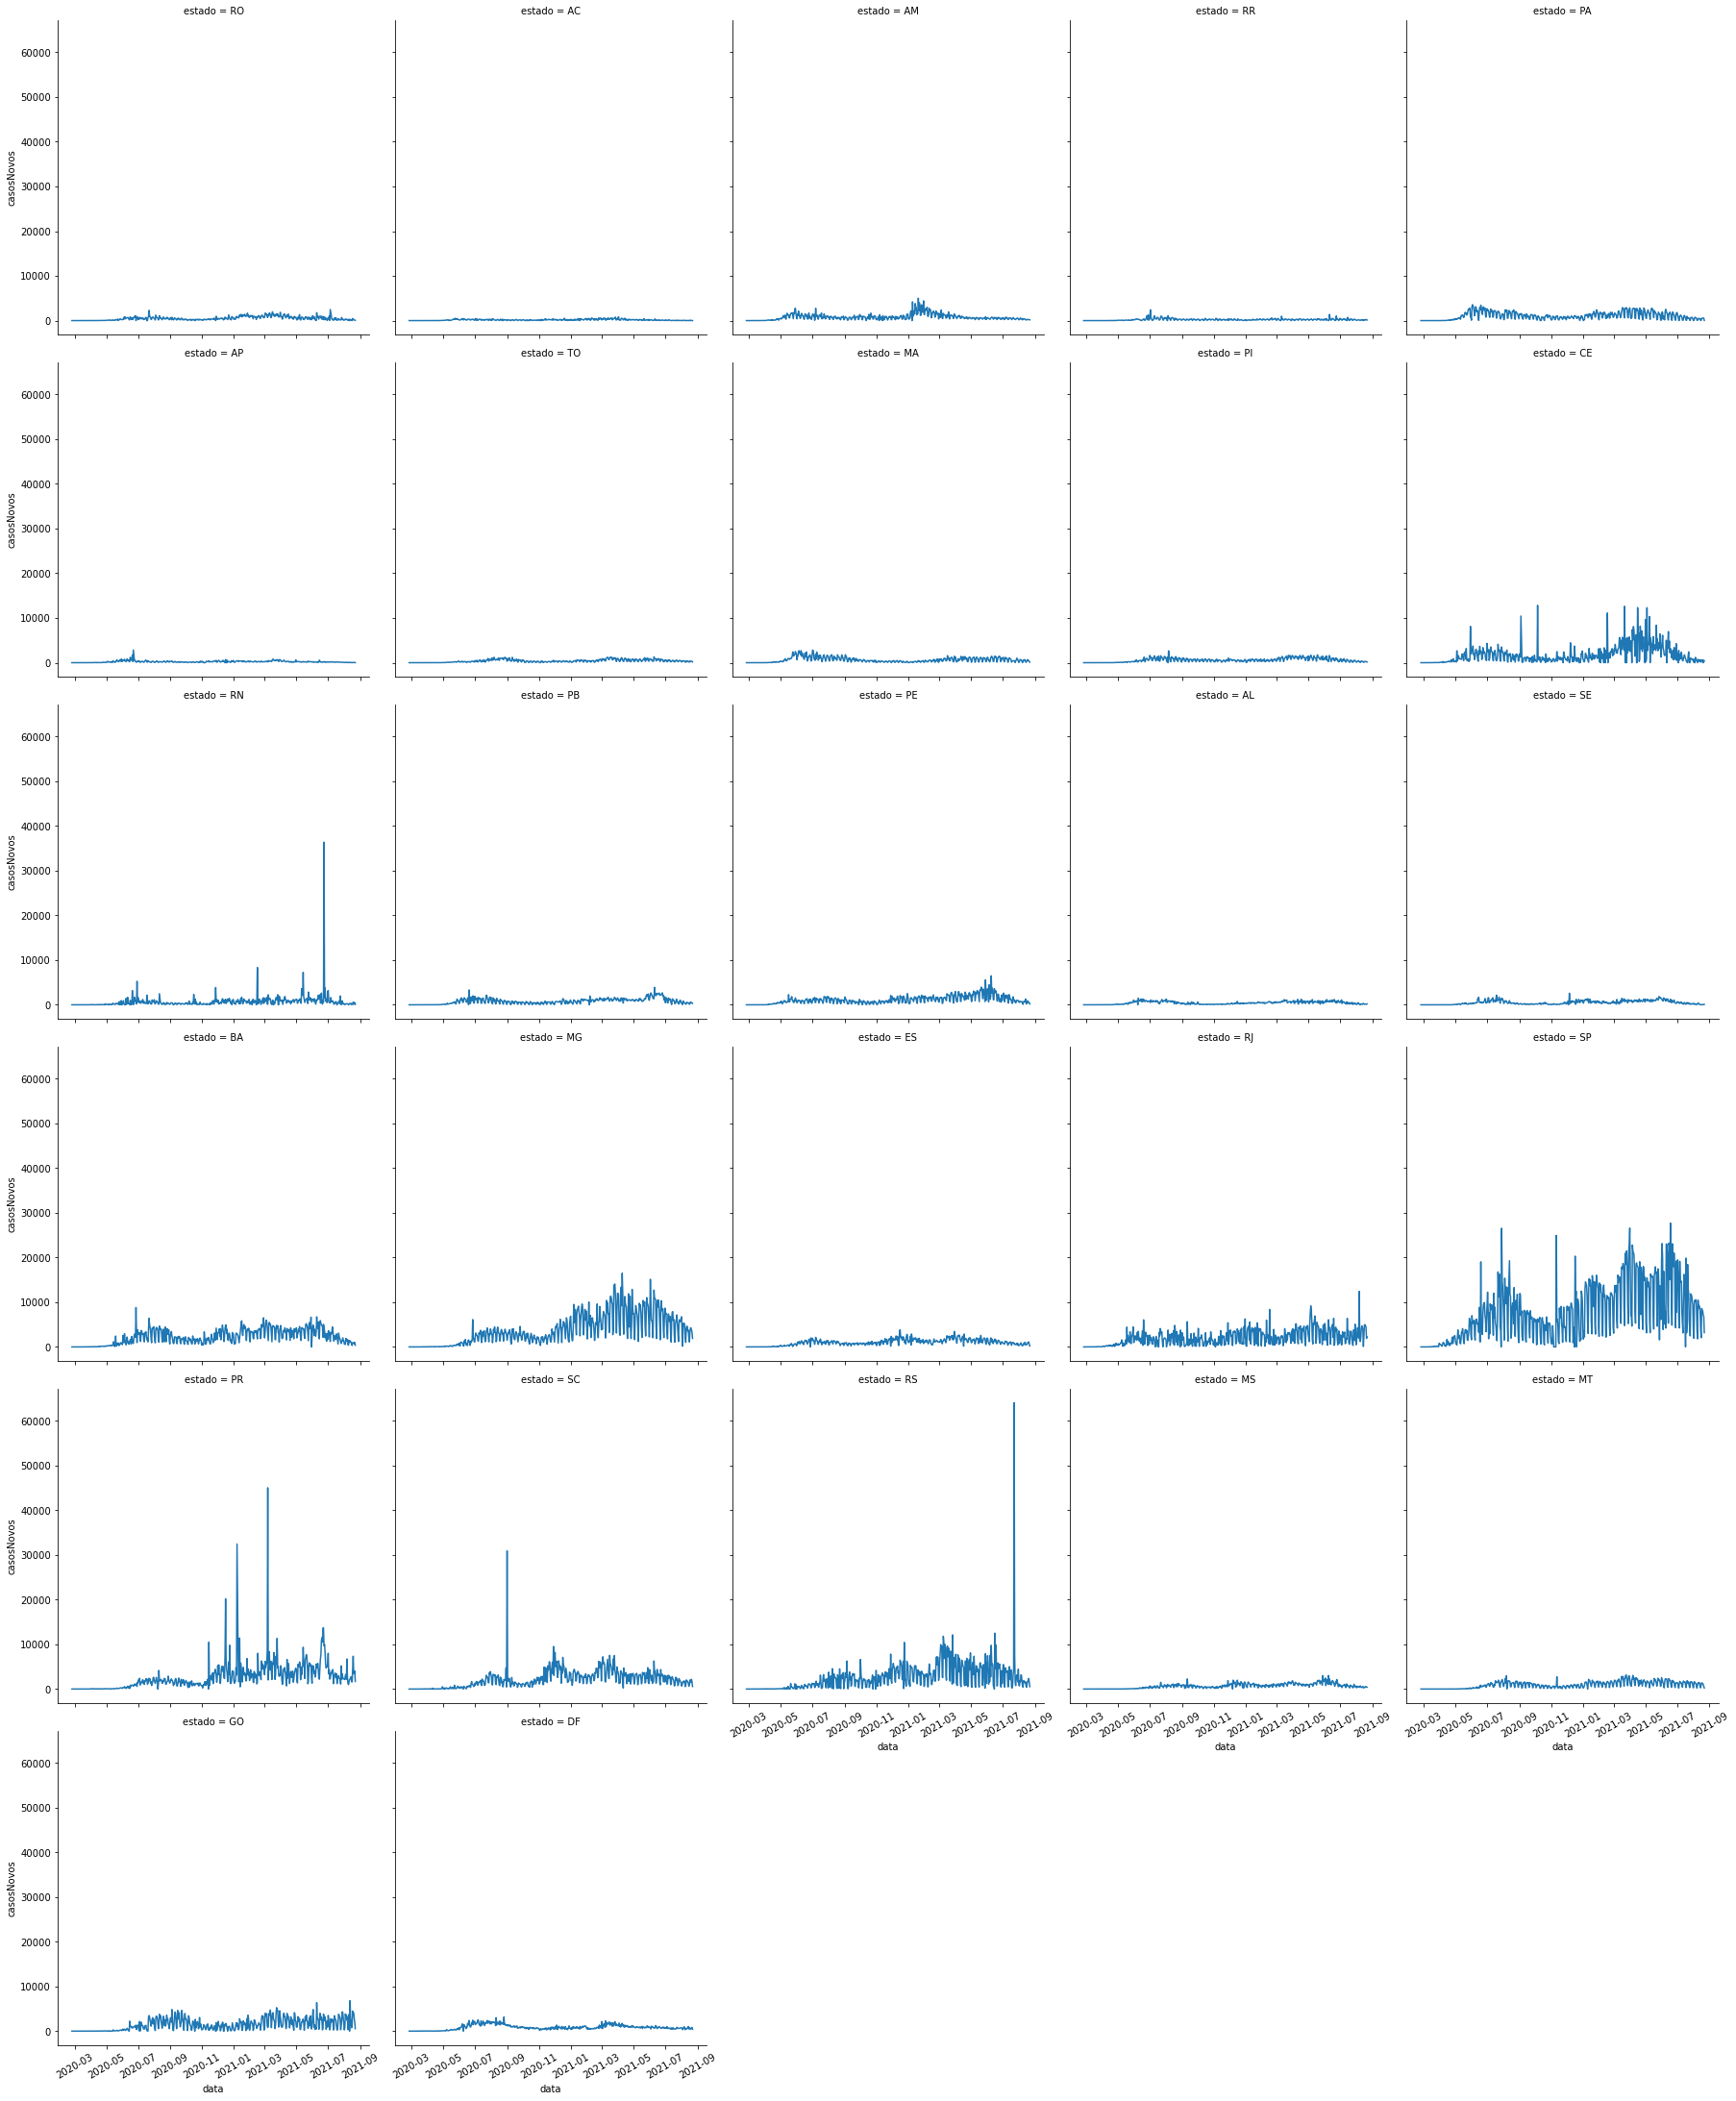

In [11]:
# Para apresentar os dados de crescimento de casos de covid é gerado um gráfico para cada estado
# Como mostrado abaixo, seguindo o número de casos novos que surgiam
plotar = dadosCovid[['estado','data','casosNovos']]
sns.color_palette("husl", 8)
g = sns.relplot(x='data', y='casosNovos', kind="line", col='estado', col_wrap= 5,data = plotar, palette="icefire")
g.set_xticklabels(rotation=30)

7. Qual a maior taxa de crescimento de óbitos de covid em cada estado? Em que período isso ocorreu?


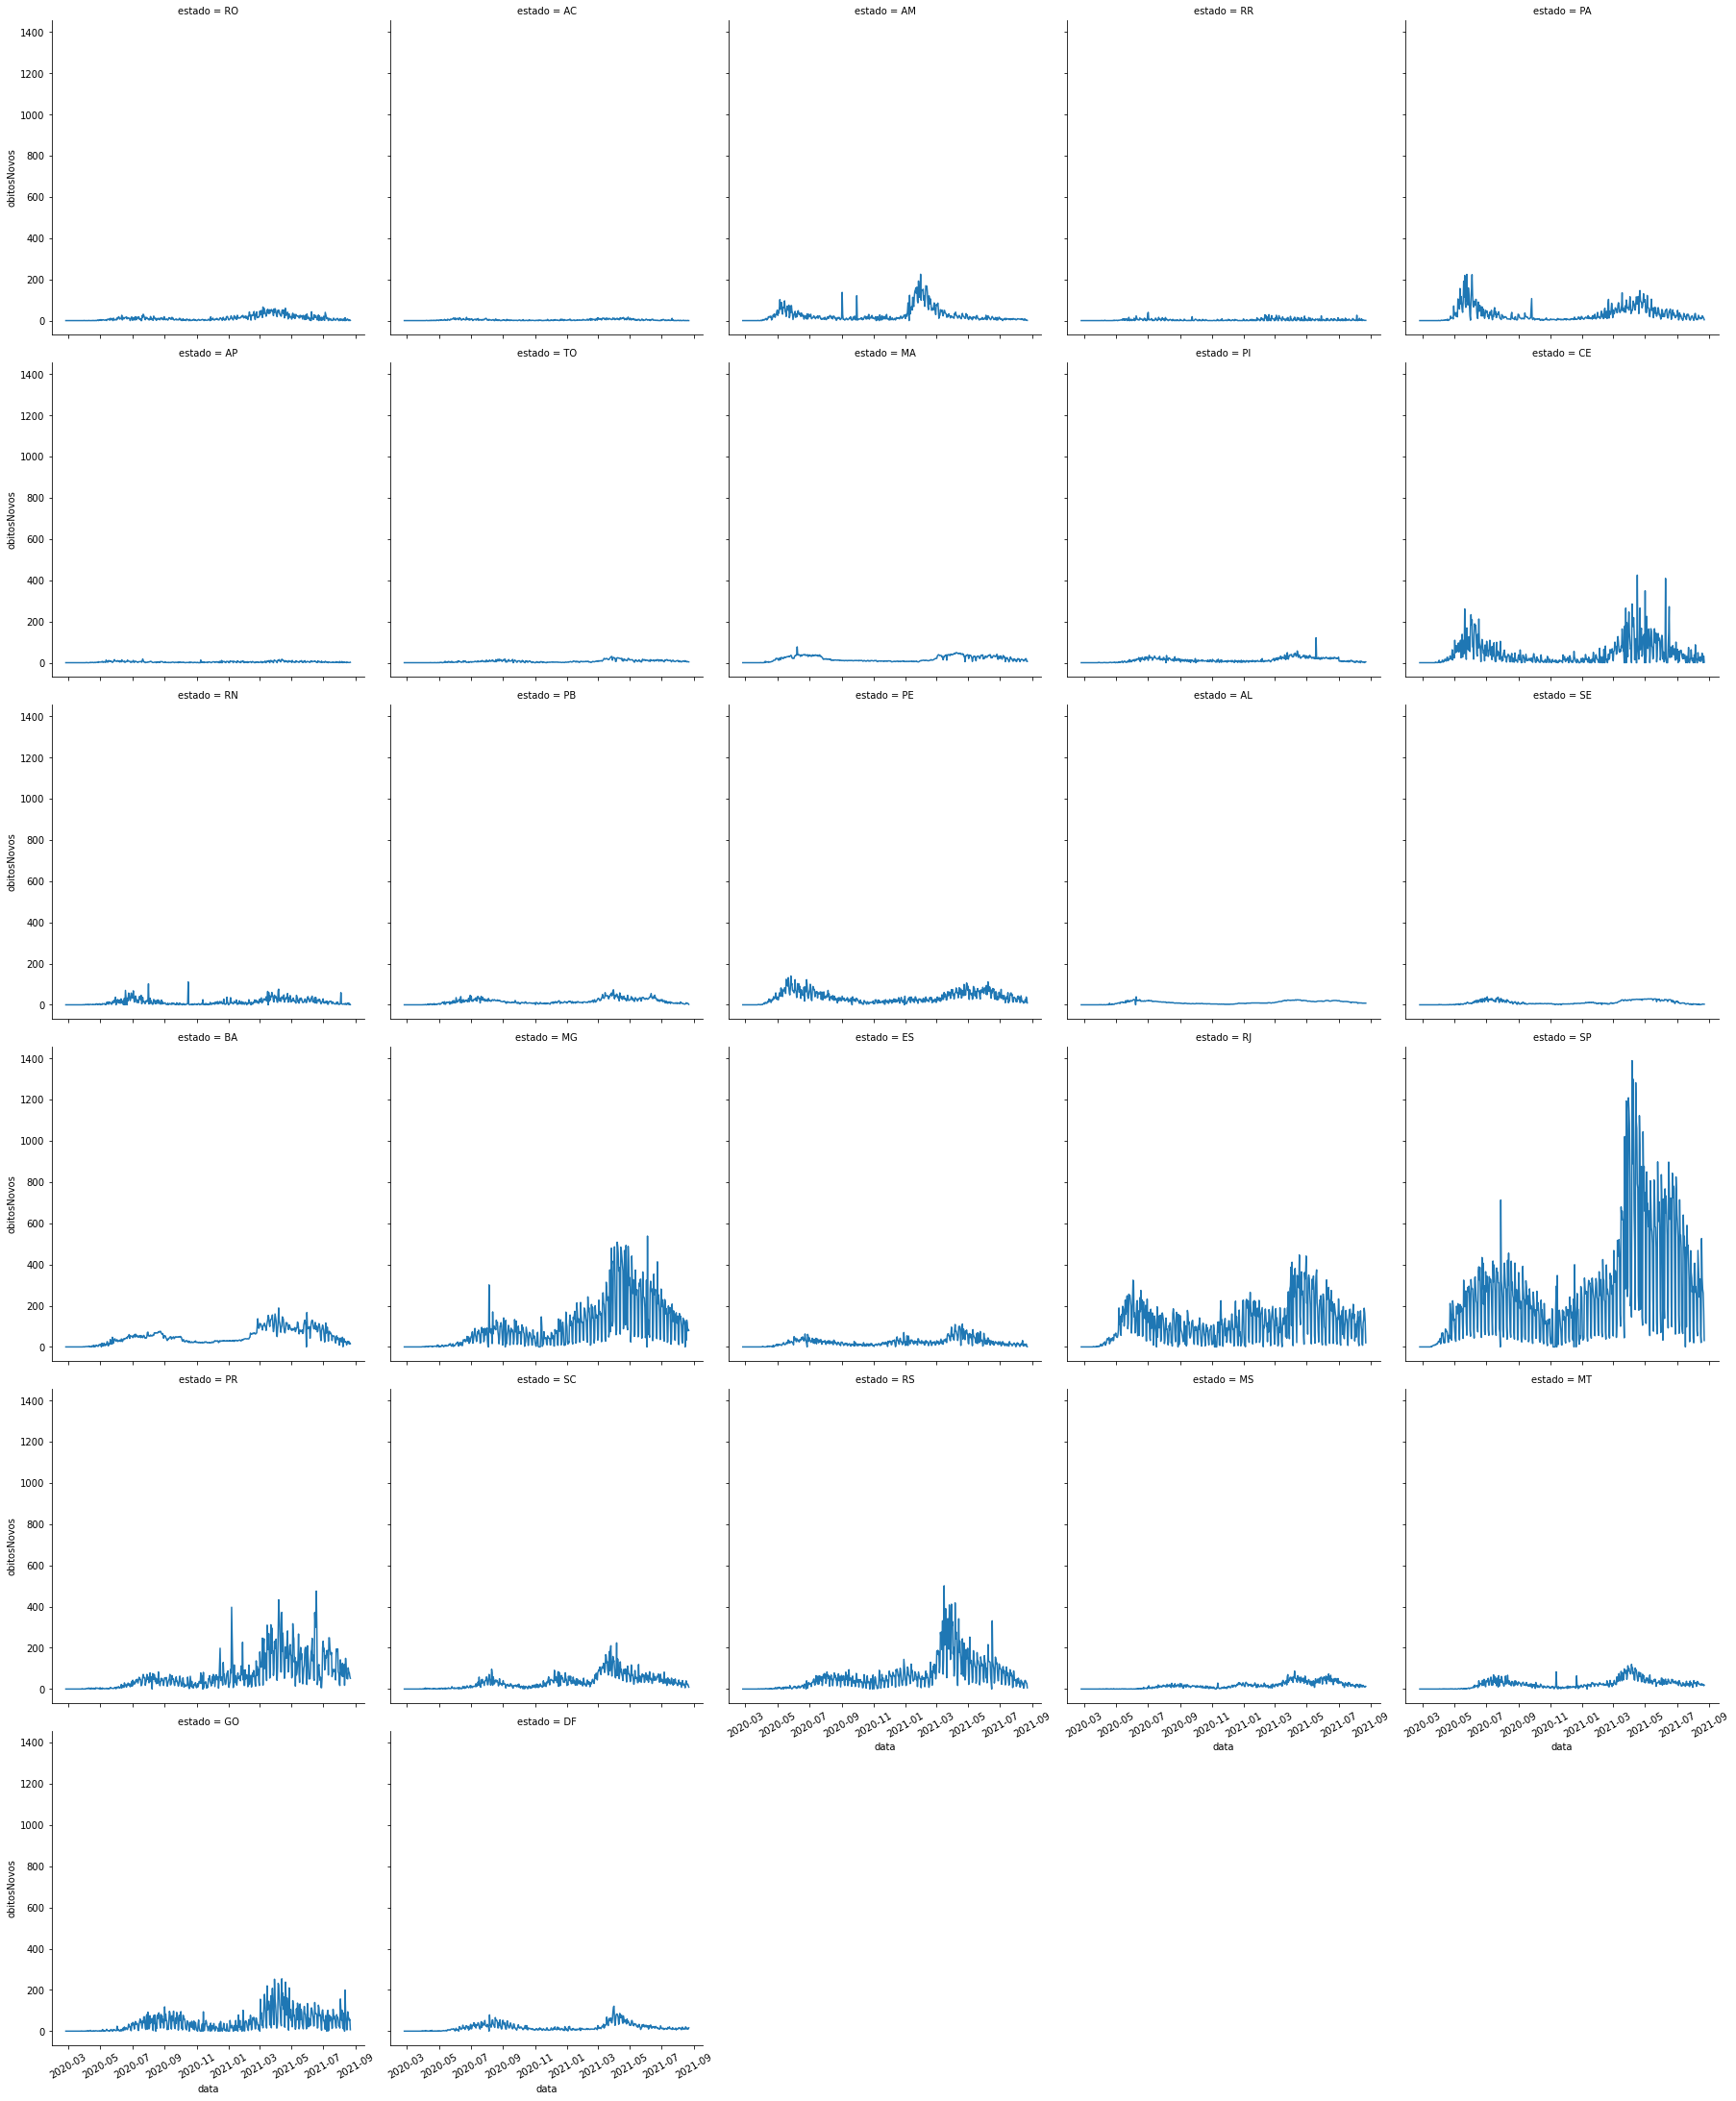

In [12]:
# Para apresentar os dados de crescimento de casos de covid é gerado um gráfico para cada estado
# Como mostrado abaixo, seguindo o número de obitos novos que surgiam
plotar = dadosCovid[['estado','data','obitosNovos']]
g = sns.relplot(x='data', y='obitosNovos', kind="line", col='estado', col_wrap= 5,data = plotar, palette="icefire")
g.set_xticklabels(rotation=30)

### 📈 Taxa de Vacinação

8. Amostragem dos dados de vacinação por estado.


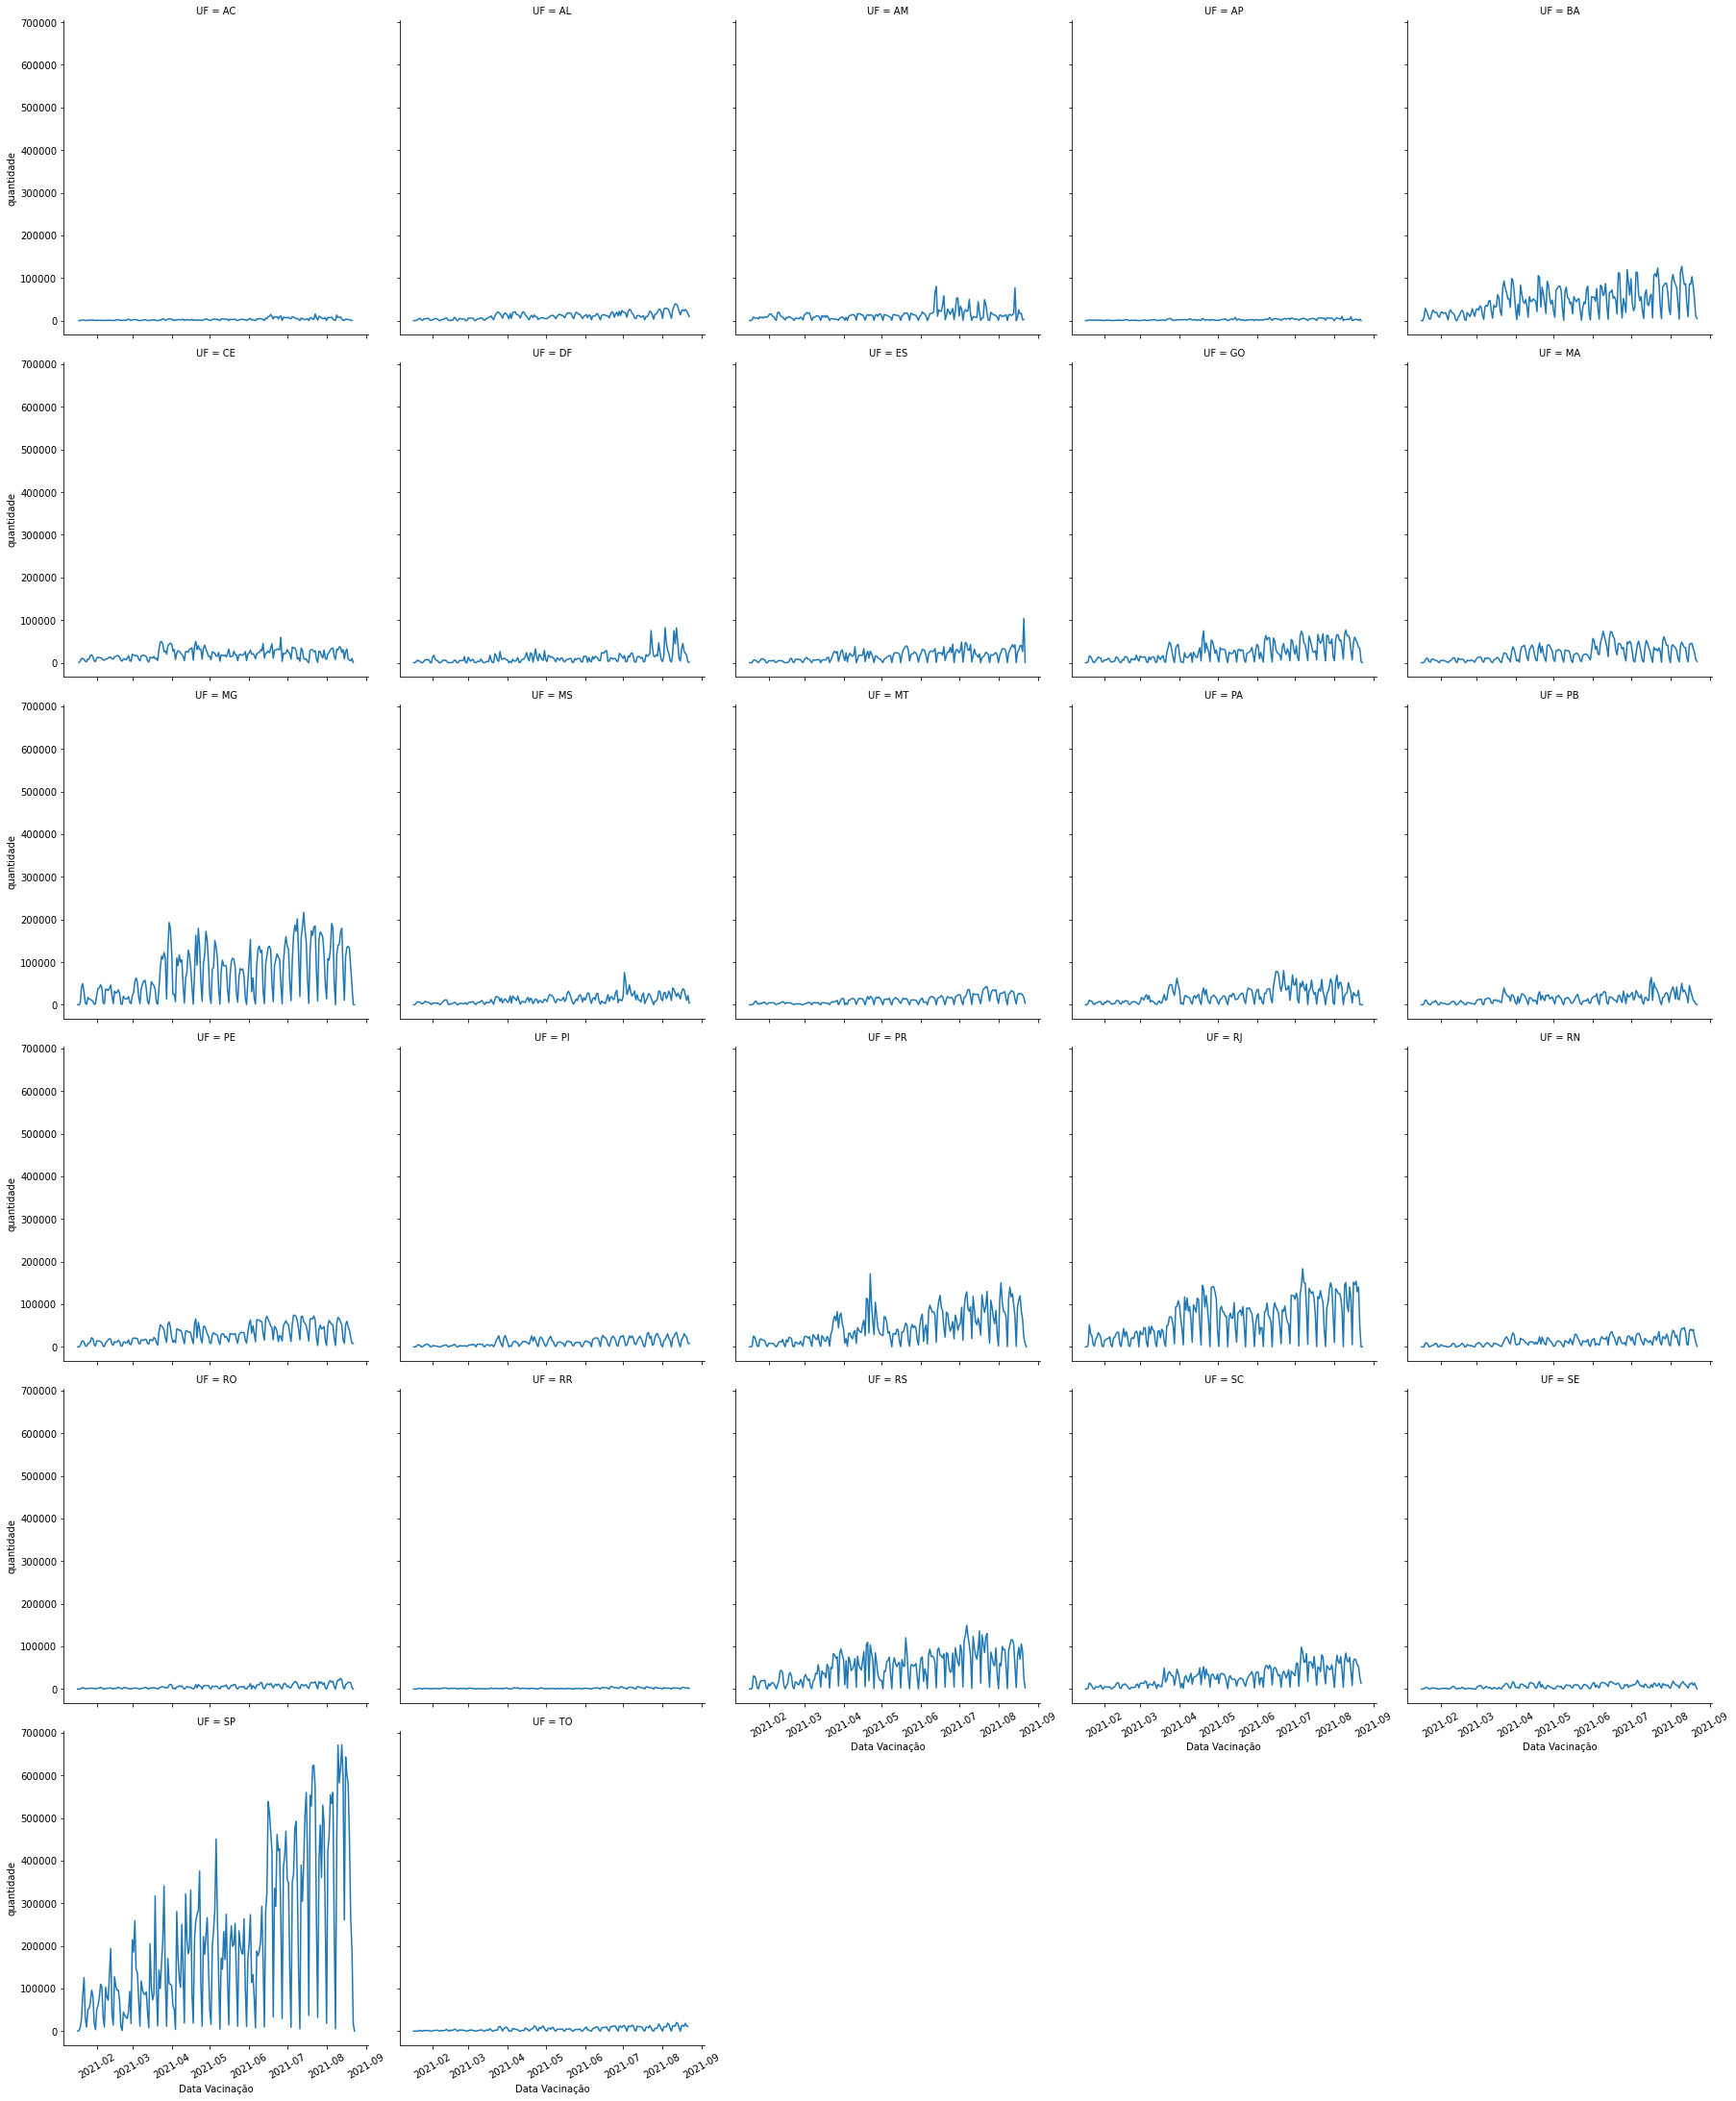

In [13]:
g = sns.relplot(x='Data Vacinação', y='quantidade', kind="line", col='UF', col_wrap= 5,data = dadosVacinacaoData, palette="icefire")
g.set_xticklabels(rotation=30)

9. Qual o estado com maior taxa de vacinação?


In [14]:
agrupamentoVacinas = dadosTipoVacina.groupby(by=["UF","Fabricante"]).sum()
teste = agrupamentoVacinas.reset_index()
teste['Vacinados'] = np.where(teste['Fabricante']=='JANSSEN', teste['Doses Aplicadas'], teste['Dose 2'])
numVacinadosPorEstado = teste.groupby(by="UF").sum()

# Sabendo que os dados estão organizados pelas doses da vacina, temos que é necessário
# utilizar da populção presente nos dados de covid e encontrar a taxa de vacinação de
# acordo com as doses efetivas (única e segunda dose)
populacaoPorEstado = dadosPorEstado[["populacaoTCU2019","estado","regiao"]]
PopulacaoVacinada = populacaoPorEstado.join(numVacinadosPorEstado, on='estado')
PopulacaoVacinada["TaxaVacinados"] = round((PopulacaoVacinada.Vacinados / PopulacaoVacinada.populacaoTCU2019 )*100,2)
maisVacinado = PopulacaoVacinada.sort_values('TaxaVacinados',ascending=False).iloc[0].estado
taxaDeVacina = PopulacaoVacinada.sort_values('TaxaVacinados',ascending=False).iloc[0].TaxaVacinados

print("🔵 O Estado com a Maior Taxa de Vacinação pela População, levando em conta a Aplicação das duas doses em relação a população de 2019 é o estado "+
    maisVacinado + " com " + str(taxaDeVacina)+"%")

🔵 O Estado com a Maior Taxa de Vacinação pela População, levando em conta a Aplicação das duas doses em relação a população de 2019 é o estado MS com 40.14%


In [15]:
PopulacaoVacinada.sort_values(by=['TaxaVacinados'])

,populacaoTCU2019,estado,regiao,Doses Aplicadas,Dose 1,Dose 2,Vacinados,TaxaVacinados
2591597,845731.0,AP,Norte,498345,379610,108984,118735,14.04
2591491,605761.0,RR,Norte,359881,270636,79122,89245,14.73
2591809,9132078.0,CE,Nordeste,4544135,3164966,1336833,1401026,15.34
2591544,8602865.0,PA,Norte,4777817,3449326,1219795,1328491,15.44
2592074,2298696.0,SE,Nordeste,1418873,1040728,351567,378145,16.45
2591438,4144597.0,AM,Norte,2758738,2032419,689044,726319,17.52
2591703,7075181.0,MA,Nordeste,4691528,3355912,1232090,1335616,18.88
2591332,1777225.0,RO,Norte,1266956,920805,316842,349921,19.69
2591650,1572866.0,TO,Norte,1097819,785339,282901,312480,19.87
2592127,14873064.0,BA,Nordeste,9950019,6973035,2752265,2976987,20.02


10. Qual a região com maior taxa de vacinação?


In [16]:
# Organizando os dados por região
regiaoVacinacao = PopulacaoVacinada.groupby(by="regiao").sum()
regiaoVacinacao["TaxaVacinados"] = round((regiaoVacinacao.Vacinados / regiaoVacinacao.populacaoTCU2019 )*100,2)
regiaoVacinacao = regiaoVacinacao.reset_index()

# Verificando a região com maior valor de vacinação
maisVacinado = regiaoVacinacao.sort_values('TaxaVacinados',ascending=False).iloc[0].regiao
taxaDeVacina = regiaoVacinacao.sort_values('TaxaVacinados',ascending=False).iloc[0].TaxaVacinados

print("⚪ A REgião com a Maior Taxa de Vacinação pela População, levando em conta a Aplicação das duas doses em relação a população de 2019 é a região "+
    maisVacinado + " com " + str(taxaDeVacina)+"%")

⚪ A REgião com a Maior Taxa de Vacinação pela População, levando em conta a Aplicação das duas doses em relação a população de 2019 é a região Sul com 28.71%


In [17]:
regiaoVacinacao

,regiao,populacaoTCU2019,Doses Aplicadas,Dose 1,Dose 2,Vacinados,TaxaVacinados
0,Centro-Oeste,16297074.0,13234147,9193683,3578996,4088728,25.09
1,Nordeste,57071654.0,37825260,26793793,10323468,11131620,19.50
2,Norte,18430980.0,11391076,8283039,2872021,3111807,16.88
3,Sudeste,88371433.0,79921500,54995281,22961647,24926456,28.21
4,Sul,29975984.0,27114449,18514882,7759326,8607318,28.71


11. Existe uma relação entre a taxa de vacinação e a diminuição de casos em cada estado?

Olhando para cada um dos estados, temos que de acordo com a taxa de vacinação ir cresvendo, o número de casos em geral tem diminuído, porém, devemos citar que mesmo com a vacinação alguns estados, como Rio Grande do Sul e Roraraima, obtivemos alguns outliers nos casos.

In [18]:
dadosCovid[(dadosCovid.estado == 'AP') & (dadosCovid.casosNovos == 0)]
#dadosVacinacaoData[dadosVacinacaoData['UF'] == 'AP']

,regiao,estado,municipio,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
948,Norte,AP,NaN,2020-02-25,9,845731.0,0.0,0,0,0
949,Norte,AP,NaN,2020-02-26,9,845731.0,0.0,0,0,0
950,Norte,AP,NaN,2020-02-27,9,845731.0,0.0,0,0,0
951,Norte,AP,NaN,2020-02-28,9,845731.0,0.0,0,0,0
952,Norte,AP,NaN,2020-02-29,9,845731.0,0.0,0,0,0
953,Norte,AP,NaN,2020-03-01,10,845731.0,0.0,0,0,0
954,Norte,AP,NaN,2020-03-02,10,845731.0,0.0,0,0,0
955,Norte,AP,NaN,2020-03-03,10,845731.0,0.0,0,0,0
956,Norte,AP,NaN,2020-03-04,10,845731.0,0.0,0,0,0
957,Norte,AP,NaN,2020-03-05,10,845731.0,0.0,0,0,0


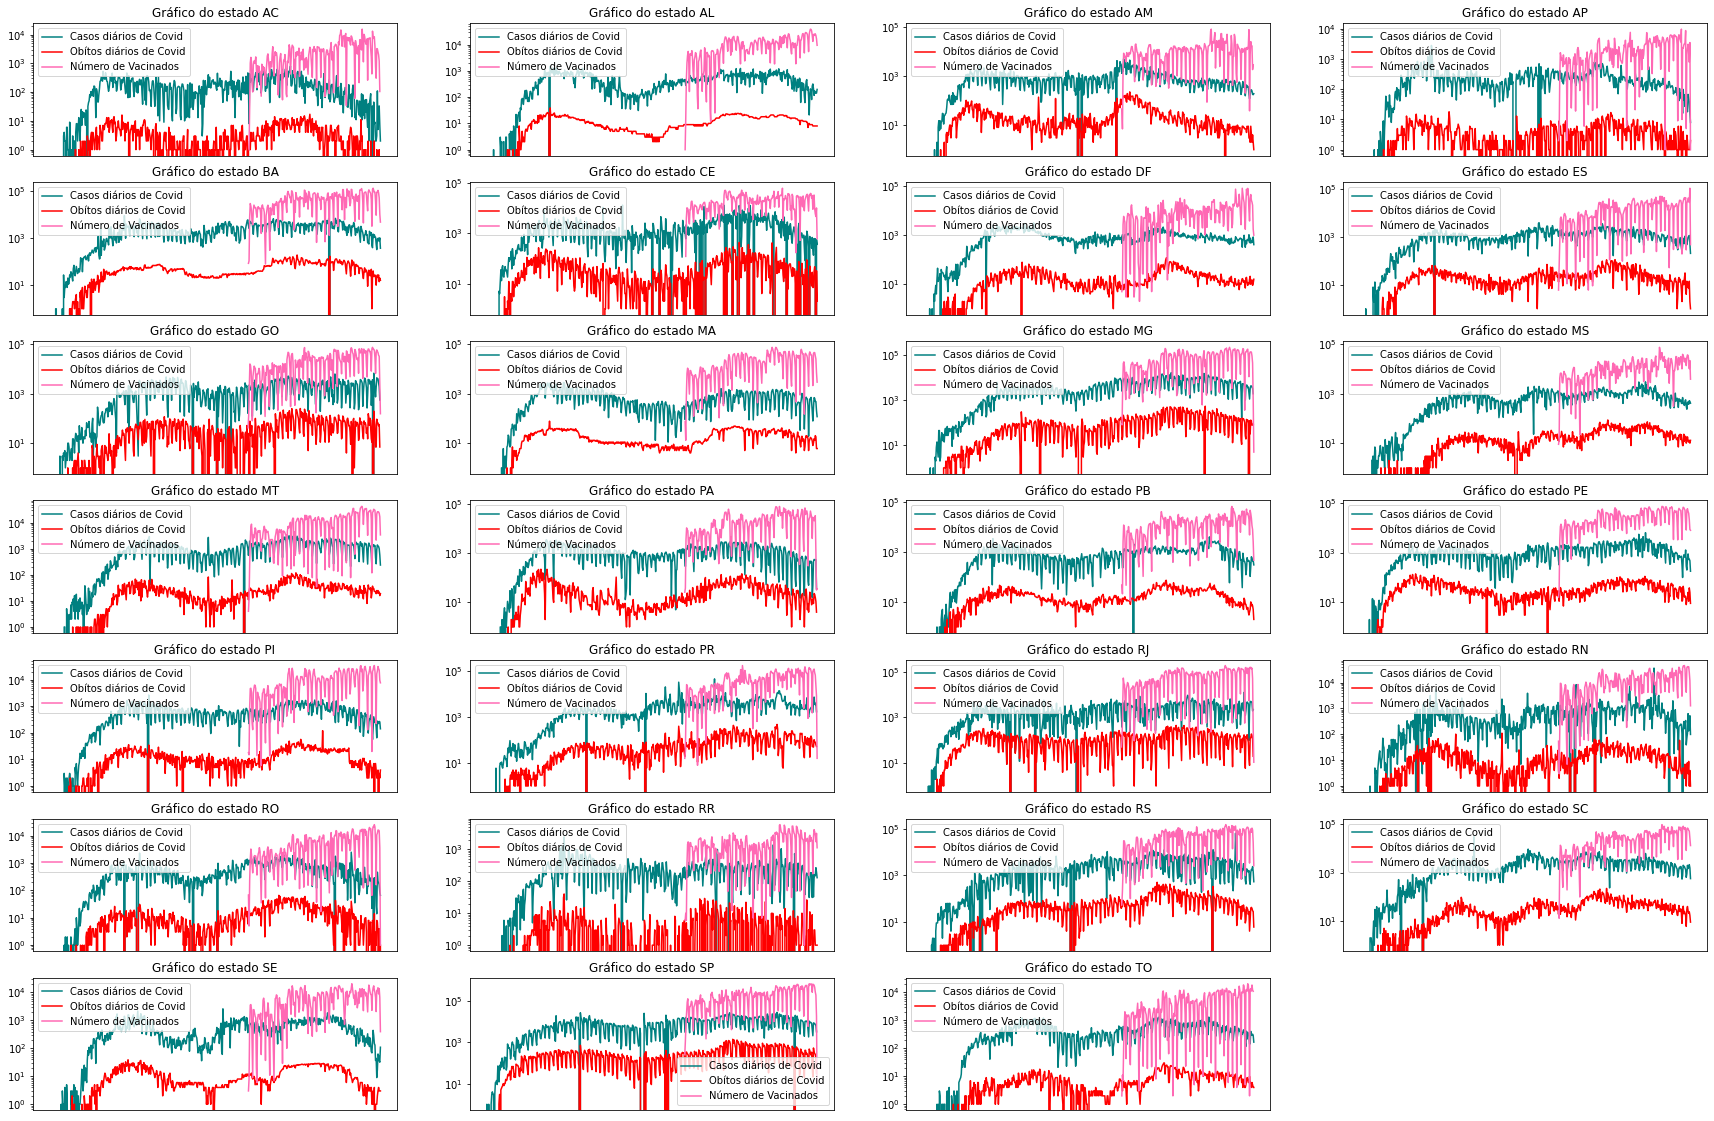

In [19]:
estados =  dadosVacinacaoData['UF'].unique()
plt.rcParams['figure.figsize'] = [30, 20]

for j,i in enumerate(estados):
    plt.subplot(7,4,j+1)

    #fig,ax = plt.subplots(nrows= 7,ncols=4)

    dadosEstados = dadosVacinacaoData[dadosVacinacaoData['UF'] == i]
    dataEstados = dadosCovid[dadosCovid.estado == i]
    dataEstados["MesAno"] = pd.to_datetime(dataEstados['data'],format = '%Y/%m/%d')


    plt.plot(dataEstados.MesAno,dataEstados.casosNovos, color='teal',label='Casos diários de Covid')
    plt.plot(dataEstados.MesAno,dataEstados.obitosNovos, color='red',label='Obítos diários de Covid')
    
    plt.yscale('log')



    plt.plot(dadosEstados['Data Vacinação'],dadosEstados.quantidade, color='hotpink',label='Número de Vacinados')
    plt.xticks(rotation=45)
    plt.title("Gráfico do estado "+str(i))
    plt.xticks([])

    plt.legend()   


plt.show()

12. Existe uma relação entre a taxa de vacinação e a diminuição de casos em cada região?

Em geral, após certo tempo de vacinação temos que nas regiões o número de casos tem diminuído, e estabilizado, porém, no caso da região Nordeste e Sul, mesmo após um bom tempo de vacinação tivemos um outlier nos casos.

In [20]:
def categorizarRegiao(estado):
    if estado in ['MT', 'GO', 'MS', 'DF']:
        return "Centro-Oeste"
    if estado in ['SP', 'MG', 'ES', 'RJ']:
        return "Sudeste"
    if estado in ['PR', 'SC', 'RS']:
        return "Sul"
    if estado in ['MA','PI','CE','RN','PB','PE','AL','SE','BA']:
        return "Nordeste"
    if estado in ['RR','AP','AM','PA','AC','RO','TO']:
        return "Norte"
    return ""

dadosVacinacaoData["regiao"] = dadosVacinacaoData.UF.apply(categorizarRegiao)
dadosRegiaoVacina = dadosVacinacaoData.groupby(by=['regiao','Data Vacinação']).agg({'quantidade' : sum})
dadosRegiaoVacina = dadosRegiaoVacina.reset_index()

In [21]:
agrupamentoRegiao = dadosCovid.groupby(by=['regiao','data']).agg({'casosNovos':sum,'obitosNovos':sum})
agrupamentoRegiao = agrupamentoRegiao.reset_index()

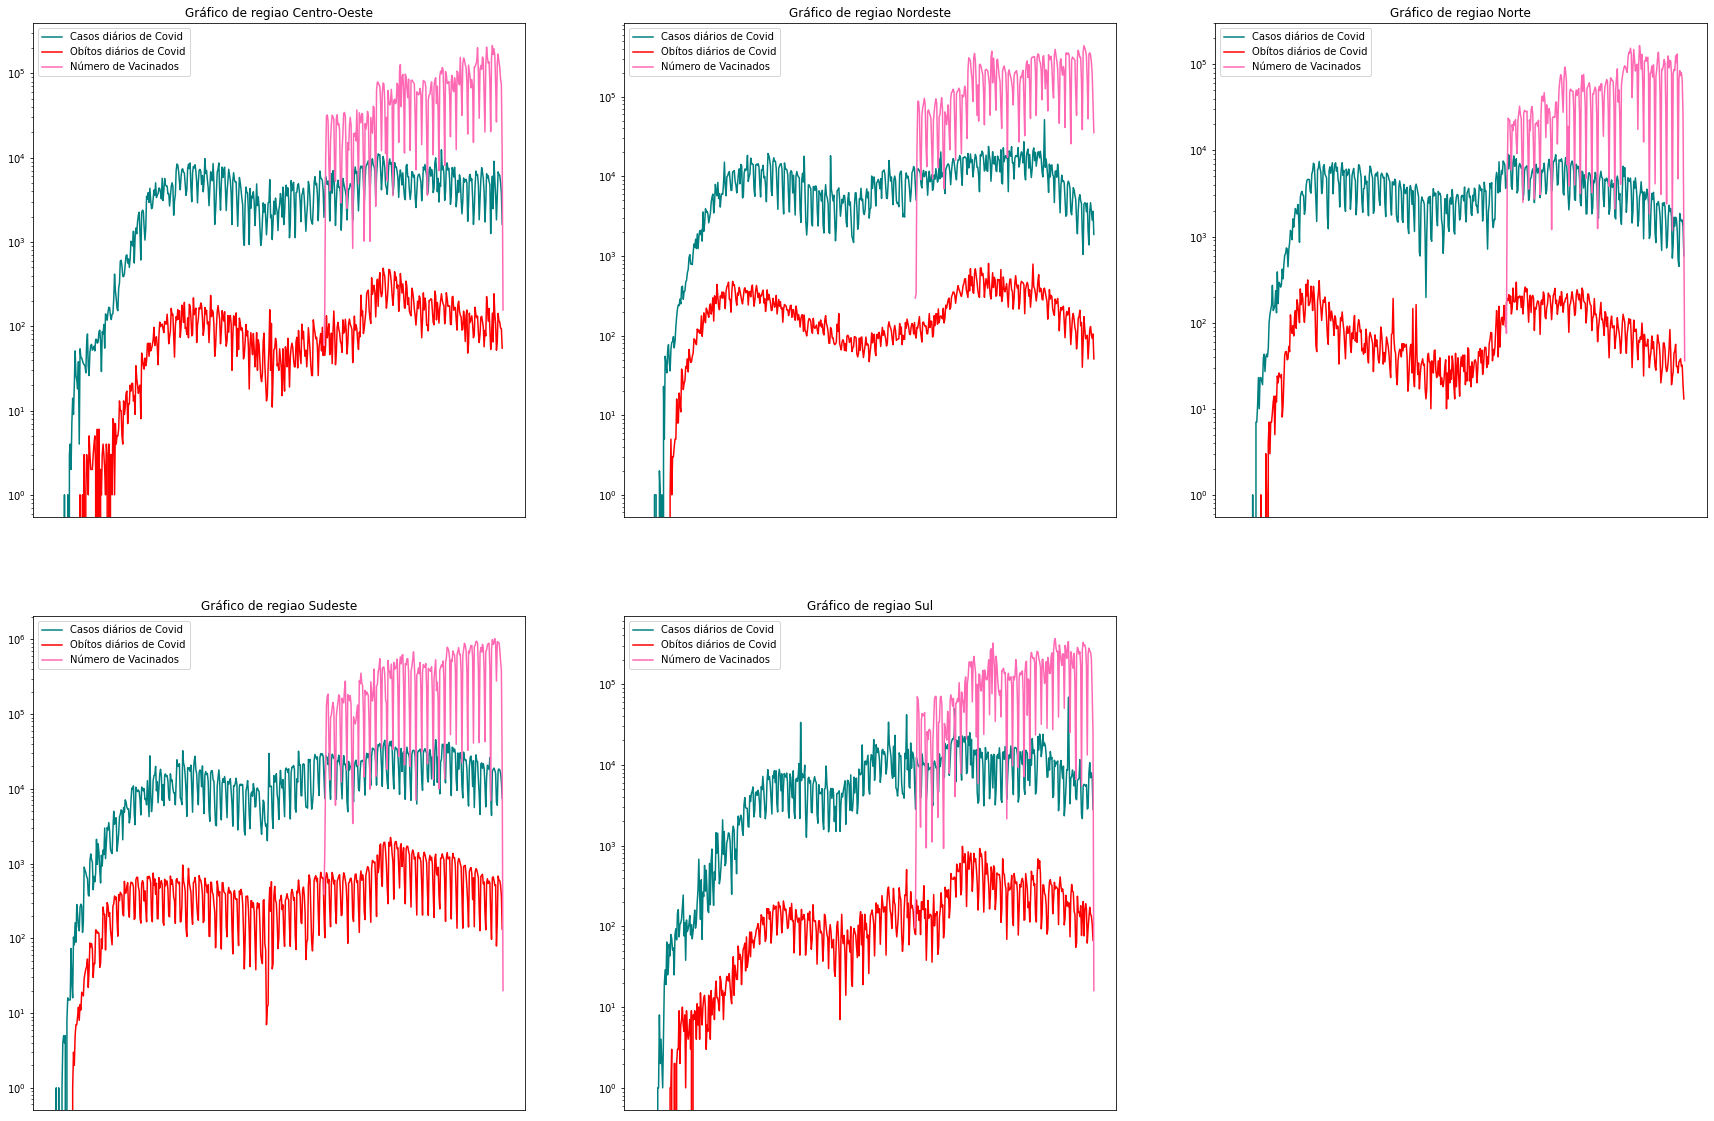

In [22]:
regiao =  dadosRegiaoVacina['regiao'].unique()
plt.rcParams['figure.figsize'] = [30, 20]

for j,i in enumerate(regiao):
    plt.subplot(2,3,j+1)

    dadosAC = dadosRegiaoVacina[dadosRegiaoVacina['regiao'] == i]
    dataAC = agrupamentoRegiao[agrupamentoRegiao.regiao == i]
    dataAC["MesAno"] = pd.to_datetime(dataAC['data'],format = '%Y/%m/%d')

    plt.plot(dataAC.MesAno,dataAC.casosNovos, color='teal',label='Casos diários de Covid')
    plt.plot(dataAC.MesAno,dataAC.obitosNovos, color='red', label='Obítos diários de Covid')

    plt.plot(dadosAC['Data Vacinação'],dadosAC.quantidade, color='hotpink',label='Número de Vacinados')
    #plt.xticks(rotation=45)
    plt.title("Gráfico de regiao "+str(i))
    plt.xticks([])
    plt.yscale('log')
    plt.legend()   


    
plt.show()

### 💰 Situação Socioecônomica

13. Amostragem de situação socioeconômica por estado, através do PIB.

In [23]:
dadosPIB = dadosEleicaoPIB[['PIB']]
dadosPIB.sort_values(by=['PIB'])

,PIB
Estado,
RR,13370
AC,15331
AP,16795
TO,35666
SE,42018
RO,44914
PI,50378
AL,54413
PB,64374


14. Os estados com menor PIB, tiveram alguma relação com o aumento de casos de covid?

Olhando para o gráfico gerado abaixo, podemos notar que os estados com menores PIB tiveram valores altos de casos se comparados com suas populações percentil, como pr exemplo Rondônia, que tem um dos menores valores de PIB, e um valor alto de casos de covid.

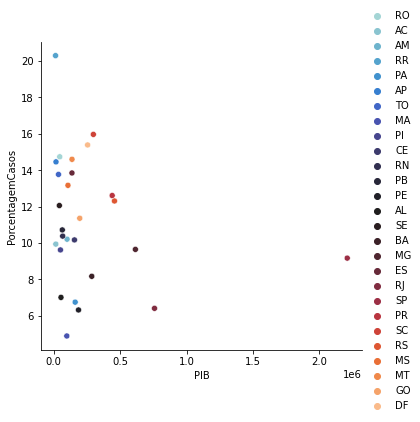

In [24]:
# Gerando um gráfico que compara o número de casos com o PIB de cada estado
dfPIBCasos = dadosPorEstado.set_index('estado')
dfPIBCasos = pd.concat([dfPIBCasos,dadosPIB], axis=1,join='inner')
toPlot = dfPIBCasos[['PIB','PorcentagemCasos']]

sns.relplot(x=toPlot.PIB, y=toPlot.PorcentagemCasos, hue=toPlot.index, palette="icefire")

15. Os estados com menor PIB, tiveram alguma relação com o número de recuperados de casos de covid?

De forma similar ao que foi feito na questão anterior, geramos um gráfico, onde temos o número de obitos, e o PIB de cada estado, e aqui o número de obitos parece ser proporcional ao visto anteriormente, como Rondônia que citamos anteriormente que tem um PIB baixo, e muitas mortes, mas além disso, é importante citar os dois principais outliers, que são os estados do Rio de Janeiro e São Paulo, que temos PIB altos, e obtiveram número muito altos de obitos por covid-19.

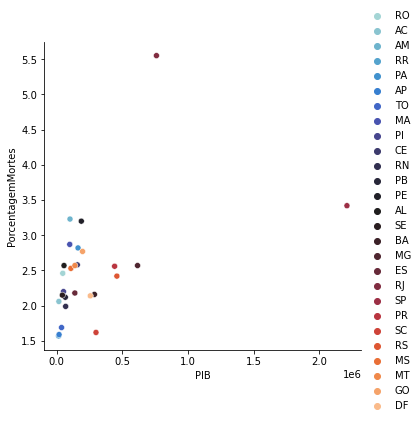

In [25]:
# Gerando um gráfico que compara o número de obitos com o PIB de cada estado
dfPIBObitos = dadosPorEstado.set_index('estado')
dfPIBObitos = pd.concat([dfPIBCasos, dadosPIB], axis=1,join='inner')
toPlot = dfPIBCasos[['PIB','PorcentagemMortes']]

sns.relplot(x=toPlot.PIB, y=toPlot.PorcentagemMortes, hue=toPlot.index, palette="icefire")

16. Os estados com menor PIB, tiveram alguma relação com a taxa de vacinação de casos de covid?

Neste caso, olhando para o gráfico gerado, podemos notar que os estados que possuem PIB menores tiveram taxas de vacinação baixas, como o Acre, em que temos quase 15% de vacinação.

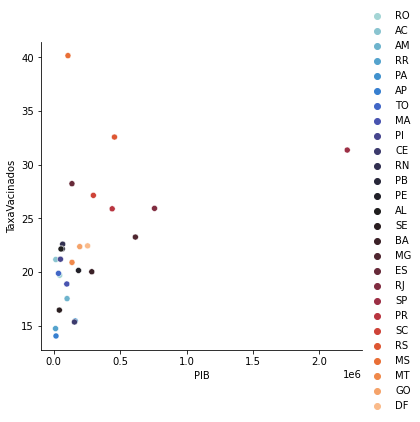

In [26]:
dfPIBVacina = PopulacaoVacinada.set_index('estado')
dfPIBVacina = pd.concat([dfPIBVacina,dadosPIB], axis=1,join='inner')
toPlot = dfPIBVacina[['PIB','TaxaVacinados']]

sns.relplot(x=toPlot.PIB, y=toPlot.TaxaVacinados, hue=toPlot.index, palette="icefire")

### 💼 Situação Política

17. Amostragem de votos durante a última eleição a favor do atual presidente.

In [27]:
dadosEleicao = dadosEleicaoPIB[['PorcentagemVotos']]
dadosEleicao.sort_values(by=['PorcentagemVotos'])

,PorcentagemVotos
Estado,
PI,18.76
CE,21.74
BA,23.41
MA,24.28
SE,27.21
RN,30.21
PE,30.57
PB,31.30
AL,34.40


18. O apoio ao presidente tem alguma relação com as regiões com maior taxa de casos de covid?

Como mostrado no gráfico gerado abaixo, temos que os estados que obtiveram maior número de votos em relação ao atual presidente foram aqueles que tiveram número alto de casos, como por exemplo Roraima, que teve o maior número de porcentagem de votos, e um dos maiores valores de porcentagem de casos de covid.

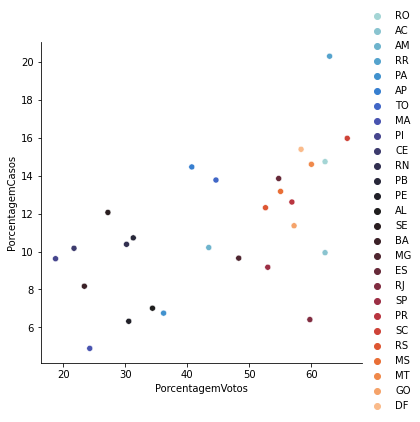

In [28]:
dfVotosCasos = dadosPorEstado.set_index('estado')
dfVotosCasos = pd.concat([dfPIBCasos, dadosEleicao], axis=1,join='inner')
toPlot = dfVotosCasos[['PorcentagemVotos','PorcentagemCasos']]

sns.relplot(x=toPlot.PorcentagemVotos, y=toPlot.PorcentagemCasos, hue=toPlot.index, palette="icefire")

19. O apoio ao presidente tem alguma relação com as regiões com maior taxa de óbitos de covid?

Assim como no caso anterior, temos que os estados com altas porcentagem de votos obtiveram porcentagem de óbitos, tendo como excessão os dois estados com maior porcentagem de votos (Santa Catarina e Roraima).

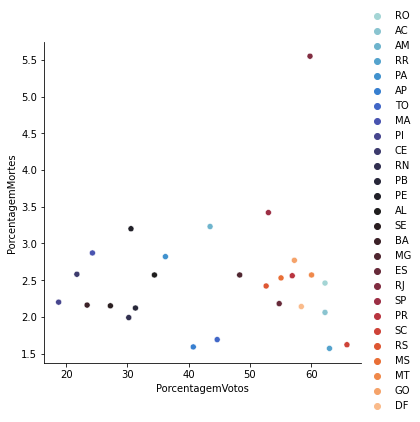

In [29]:
dfVotosObitos = dadosPorEstado.set_index('estado')
dfVotosObitos = pd.concat([dfVotosObitos, dadosEleicao], axis=1,join='inner')
toPlot = dfVotosObitos[['PorcentagemVotos','PorcentagemMortes']]

sns.relplot(x=toPlot.PorcentagemVotos, y=toPlot.PorcentagemMortes, hue=toPlot.index, palette="icefire")

20. O apoio ao presidente tem alguma relação com as regiões com maior taxa de vacinação?

Para a relação entre a porcentagem de votos de apoio ao presidente, e a taxa de vacinação, temos que os dados também tem relação, em que estados como o Rio de Janeiro e São Paulo tiveram cerca de 50 a 60 por cento dos votos e estão entre os valores mais altos de vacinação.

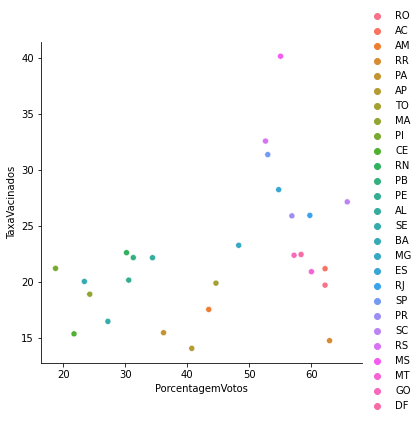

In [30]:
dfVotosVacina = PopulacaoVacinada.set_index('estado')
dfVotosVacina = pd.concat([dfVotosVacina, dadosEleicao], axis=1,join='inner')
dfVotosVacina
toPlot = dfVotosVacina[['PorcentagemVotos','TaxaVacinados']]
sns.relplot(x=toPlot.PorcentagemVotos, y=toPlot.TaxaVacinados, hue=toPlot.index)

## ## 🔴 Agrupamento de Dados, Correlação

Ou seja, de acordo com os valores da regressão linear, cada pessoa vacinada impacata de acordo com o coeficiente estimado no número de óbitos. Em todas as regiões, os valores sairam extremamente baixos, isto se justifica pela parcela da população vacinada ser uma parcela pequena, além do fato, de que as vacinas são efetivas ao longo prazo.

In [31]:
novoDadosRegiaoVacina = dadosRegiaoVacina.rename(columns={'Data Vacinação': 'data'})

In [32]:
agrupamentoRegiao.dtypes

regiao                 object
data           datetime64[ns]
casosNovos              int64
obitosNovos             int64
dtype: object

In [33]:
#Este Merged representa desde o começo da pandemia
Merged = pd.merge(agrupamentoRegiao, novoDadosRegiaoVacina, on=['regiao','data'], how='left')
Merged['quantidade'].fillna(0, inplace=True)
Merged = Merged.astype({"quantidade": int})
Merged

,regiao,data,casosNovos,obitosNovos,quantidade
0,Centro-Oeste,2020-02-25,0,0,0
1,Centro-Oeste,2020-02-26,0,0,0
2,Centro-Oeste,2020-02-27,0,0,0
3,Centro-Oeste,2020-02-28,0,0,0
4,Centro-Oeste,2020-02-29,0,0,0
...,...,...,...,...,...
2720,Sul,2021-08-18,10625,172,257396
2721,Sul,2021-08-19,6908,141,247019
2722,Sul,2021-08-20,7960,134,206529
2723,Sul,2021-08-21,7067,107,75480


In [35]:
#Este Merged, representa desde o começo da vaciniação
MergedPOSVACINA = pd.merge(agrupamentoRegiao,novoDadosRegiaoVacina, on=['regiao','data'])
MergedPOSVACINA = MergedPOSVACINA.astype({"quantidade": int})
MergedPOSVACINA

,regiao,data,casosNovos,obitosNovos,quantidade
0,Centro-Oeste,2021-01-17,1959,58,60
1,Centro-Oeste,2021-01-18,3362,45,168
2,Centro-Oeste,2021-01-19,5979,59,9102
3,Centro-Oeste,2021-01-20,5176,133,30737
4,Centro-Oeste,2021-01-21,4814,73,32147
...,...,...,...,...,...
1085,Sul,2021-08-18,10625,172,257396
1086,Sul,2021-08-19,6908,141,247019
1087,Sul,2021-08-20,7960,134,206529
1088,Sul,2021-08-21,7067,107,75480


In [36]:
from sklearn.linear_model import LinearRegression
Regioes = ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

for i in Regioes:
    regiaoAnalisada = MergedPOSVACINA[MergedPOSVACINA.regiao == i]
    x = regiaoAnalisada.quantidade
    y = regiaoAnalisada.obitosNovos

    lm = LinearRegression()
    lm.fit(x.values.reshape(-1,1),y)
    print("Região: "+str(i))
    print("Coeficiente Estimado: ",lm.coef_)
    print("R2 (score): :",lm.score(x.values.reshape(-1,1),y))
    print("------")

Região: Centro-Oeste
Coeficiente Estimado:  [0.00030641]
R2 (score): : 0.022410065838293414
------
Região: Nordeste
Coeficiente Estimado:  [0.00032736]
R2 (score): : 0.051872347735647195
------
Região: Norte
Coeficiente Estimado:  [-0.00063976]
R2 (score): : 0.13282677983603552
------
Região: Sudeste
Coeficiente Estimado:  [0.00037198]
R2 (score): : 0.04457440454558248
------
Região: Sul
Coeficiente Estimado:  [0.00037756]
R2 (score): : 0.03251907237533114
------


## 🟠 Categorização

In [37]:
categorizacao = dfPIBVacina
categorizacao.regiao = categorizacao.regiao.astype('category').cat.codes

In [38]:
from sklearn import cluster,metrics

def aplicarKmeans(colunaX,colunaY,categorizar = 'regiao'):
    kmean = cluster.KMeans(n_clusters=5)
    kmean.fit(categorizacao[[colunaX,colunaY]])
    labels = kmean.labels_

    colors = np.array(['red','black','blue','green','yellow'])
    print("Silhueta:",    metrics.silhouette_score(categorizacao, labels, metric='euclidean'))

    plt.subplot(1,2,1)
    plt.scatter(x=categorizacao[colunaX], y=categorizacao[colunaY], c=colors[categorizacao[categorizar]], s=40)
    plt.title("Agrupamento Real")
    plt.xlabel("TaxaVacinados")
    plt.ylabel("PIB")

    plt.subplot(1,2,2)
    plt.scatter(x=categorizacao[colunaX], y=categorizacao[colunaY], c=colors[kmean.labels_], s=40)
    plt.title("Agrupamento K-means")
    plt.xlabel("TaxaVacinados")
    plt.ylabel("PIB")

Silhueta: 0.3212629722985839


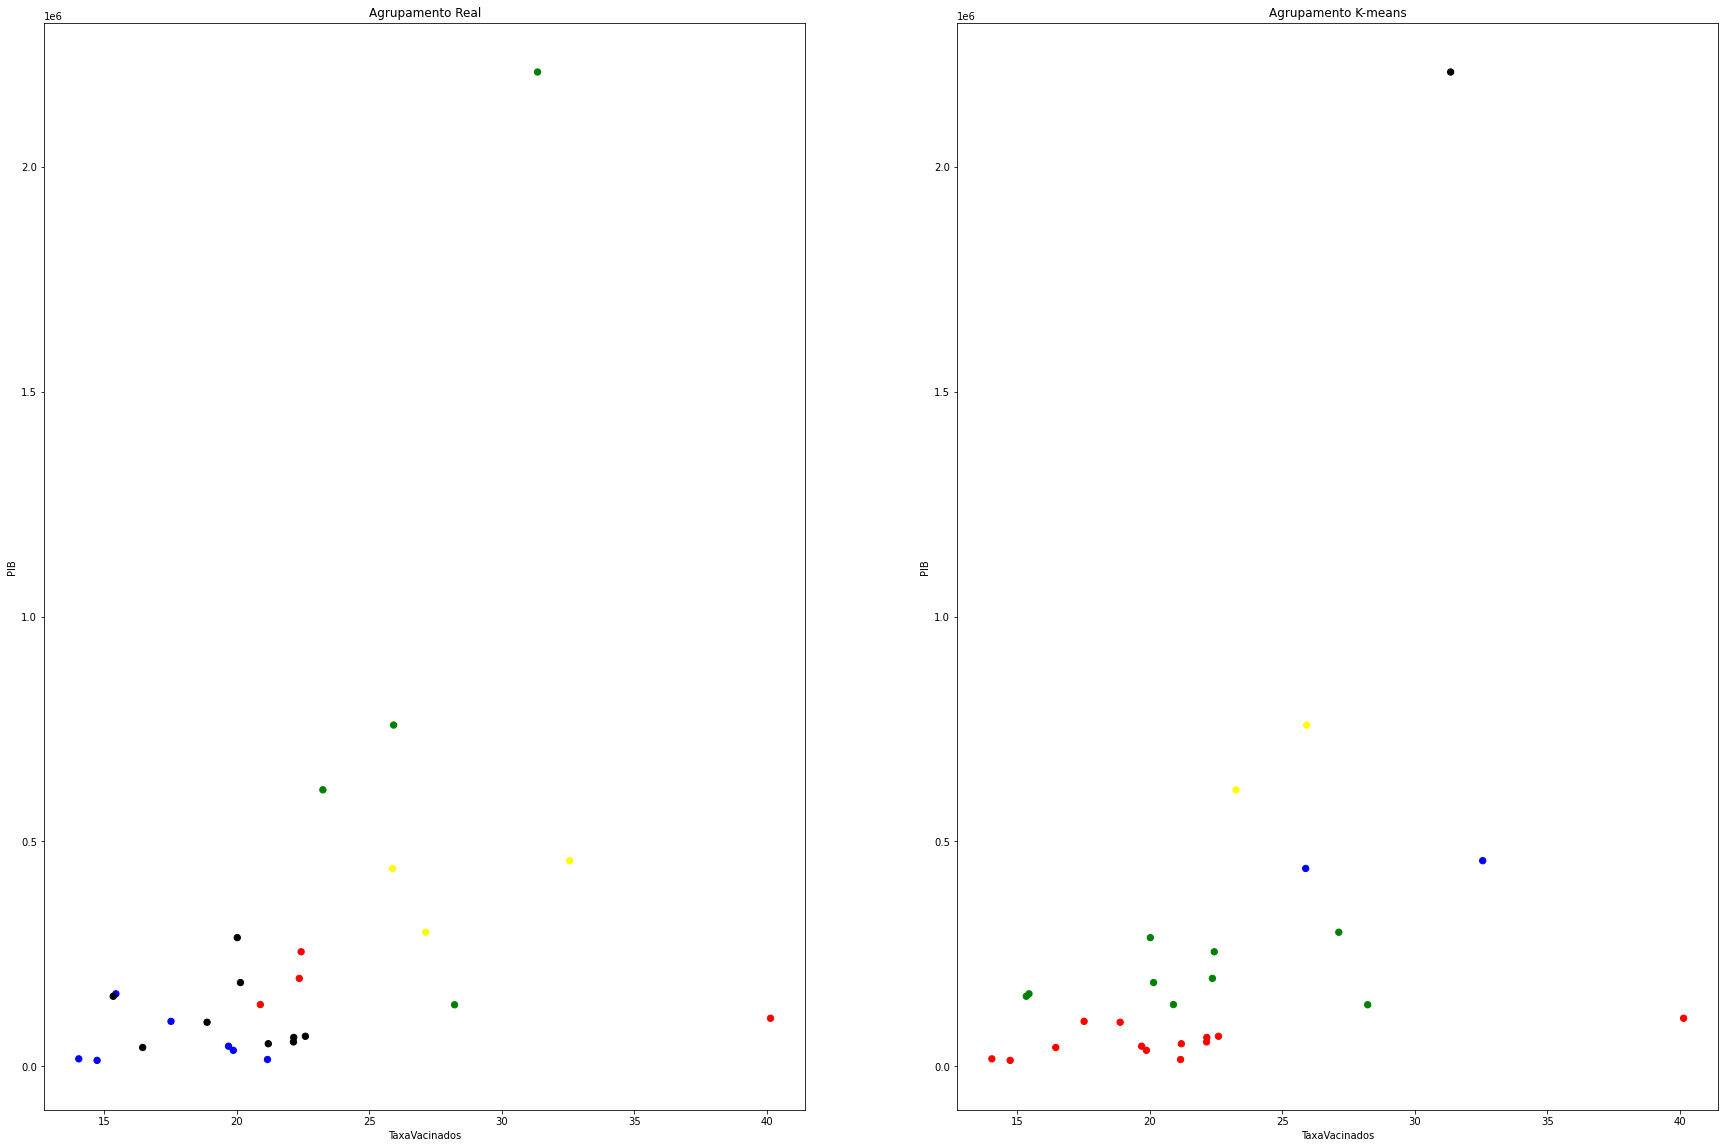

In [39]:
aplicarKmeans('TaxaVacinados','PIB')

Silhueta: 0.5129953255847722


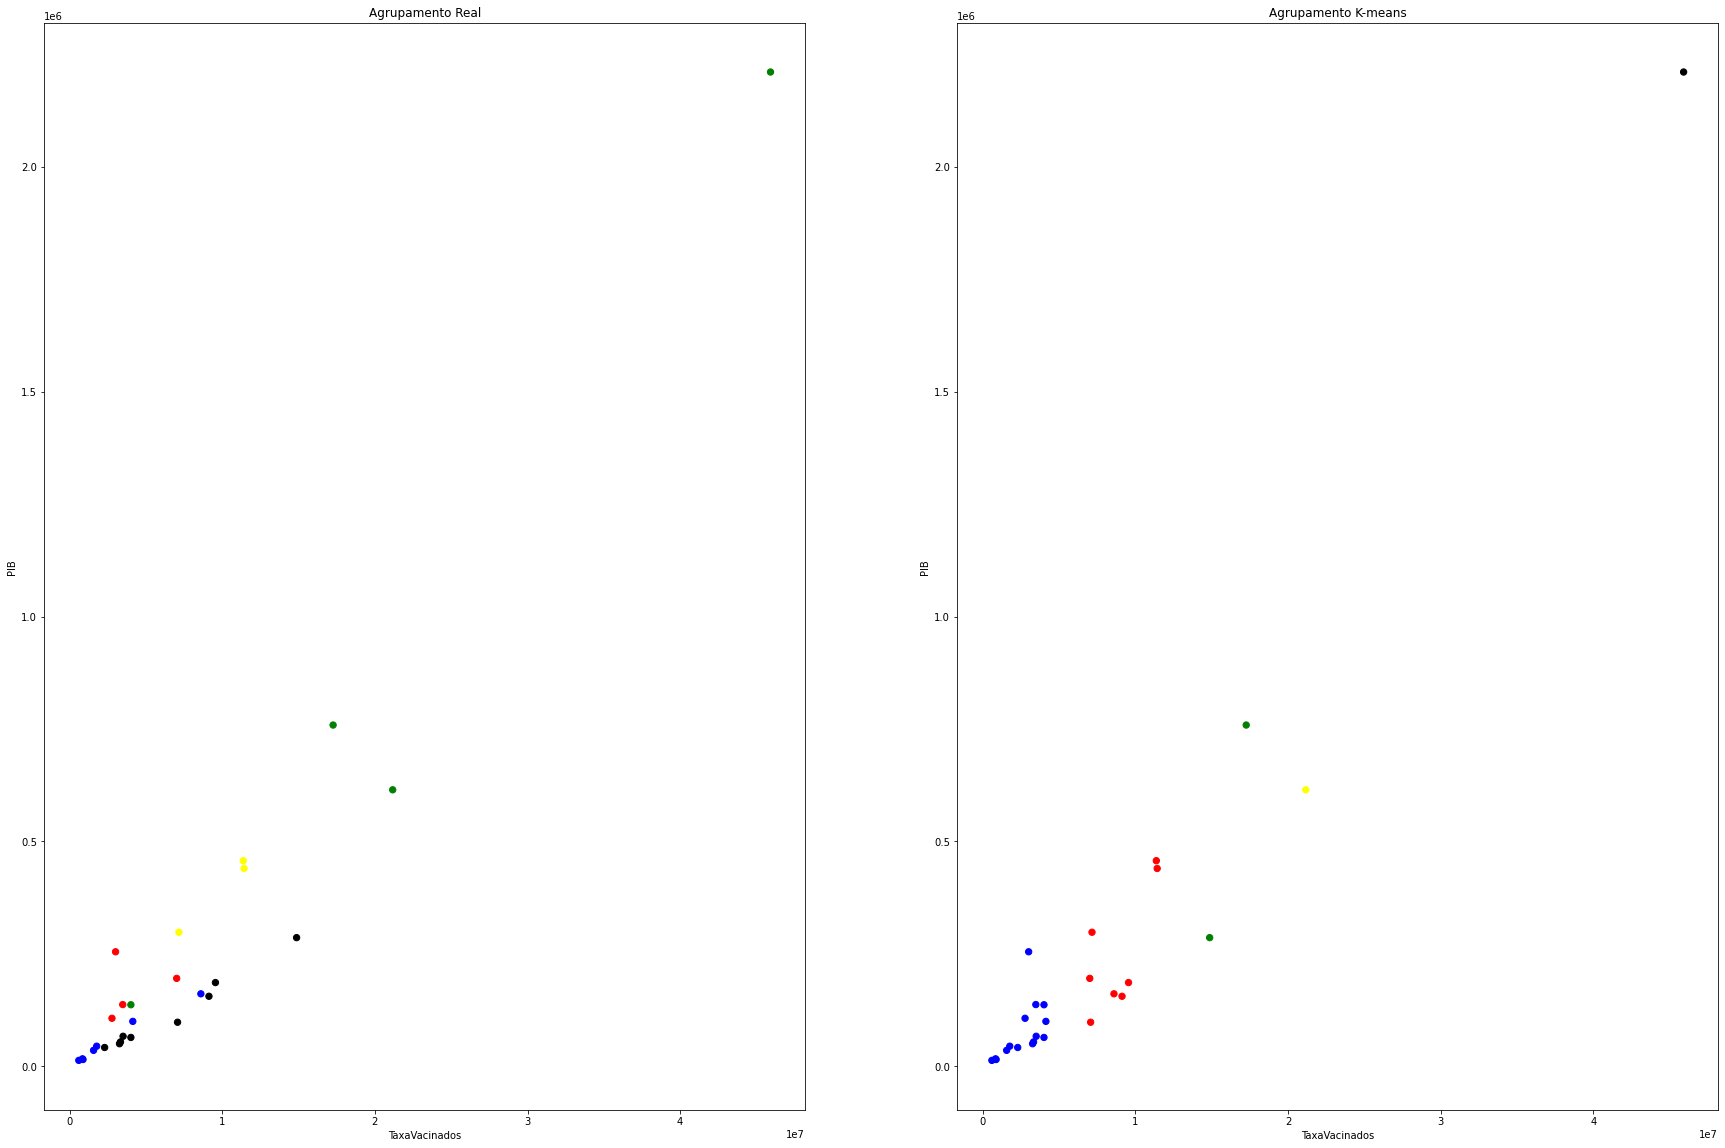

In [40]:
aplicarKmeans('populacaoTCU2019','PIB')